In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cities = pd.read_csv("./california_cities.csv")
cities.head()


,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
0,0,Adelanto,34.576111,-117.432778,875.0,2871.0,31765,56.027,56.009,0.018,145.107,145.062,0.046,0.03
1,1,AgouraHills,34.153333,-118.761667,281.0,922.0,20330,7.822,7.793,0.029,20.260,20.184,0.076,0.37
2,2,Alameda,37.756111,-122.274444,NaN,33.0,75467,22.960,10.611,12.349,59.465,27.482,31.983,53.79
3,3,Albany,37.886944,-122.297778,NaN,43.0,18969,5.465,1.788,3.677,14.155,4.632,9.524,67.28
4,4,Alhambra,34.081944,-118.135000,150.0,492.0,83089,7.632,7.631,0.001,19.766,19.763,0.003,0.01


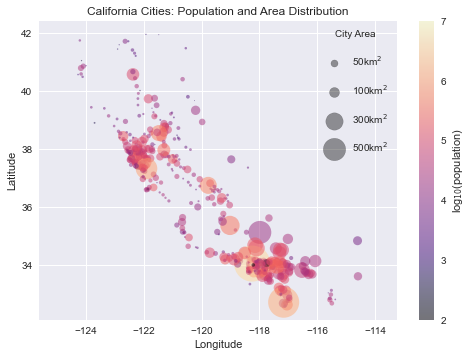

In [39]:
# Extract Latitude (vĩ độ) and Longitude (kinh độ)

lat = cities['latd']
lon = cities['longd']

population = cities['population_total']
area = cities['area_total_km2']

# Plot using Pylot API
plt.style.use('seaborn')
#plt.figure(figsize=(8,6))

plt.scatter(lon, lat,
            c=np.log10(population), cmap='magma',
            s=area,
            linewidths=0, alpha=0.5); 
# lấy log10 để scale nhỏ lại - càng đông dân thì màu càng nhạt(lấy color theo population)
# Diện tích càng lớn thì chấm càng to (lấy size theo area)

plt.axis('equal');
plt.xlabel('Longitude');
plt.ylabel('Latitude');
plt.colorbar(label='log$_{10}$(population)')
plt.clim(2,7)

# Create a legend for cities size (sort và chọn range bên dưới)
area_range = [50, 100, 300, 500]

for area in area_range:
    plt.scatter([],[], s=area, c='k', alpha=0.4,
               label=str(area) + 'km$^2$')

plt.legend(scatterpoints=1, labelspacing=1.5, title='City Area');

# Title
plt.title('California Cities: Population and Area Distribution');

In [30]:
cities['area_total_km2'].sort_values(ascending=False) # chia thành 50-100-300-500

239    1302.000
367     964.510
55      527.401
375     466.109
26      371.946
         ...   
163         NaN
237         NaN
370         NaN
393         NaN
443         NaN
Name: area_total_km2, Length: 482, dtype: float64